# Exploratory Data Analysis & Data Processing

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/air-quality-india.csv')
df.head()

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50


In [5]:
df.Timestamp= pd.to_datetime(df.Timestamp)

In [6]:
df['Date']=df["Timestamp"].dt.date

In [7]:
df.shape

(36192, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  36192 non-null  datetime64[ns]
 1   Year       36192 non-null  int64         
 2   Month      36192 non-null  int64         
 3   Day        36192 non-null  int64         
 4   Hour       36192 non-null  int64         
 5   PM2.5      36192 non-null  float64       
 6   Date       36192 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 1.9+ MB


In [9]:
df.isnull().sum()

,0
Timestamp,0
Year,0
Month,0
Day,0
Hour,0
PM2.5,0
Date,0


In [10]:
df.duplicated().sum()

0

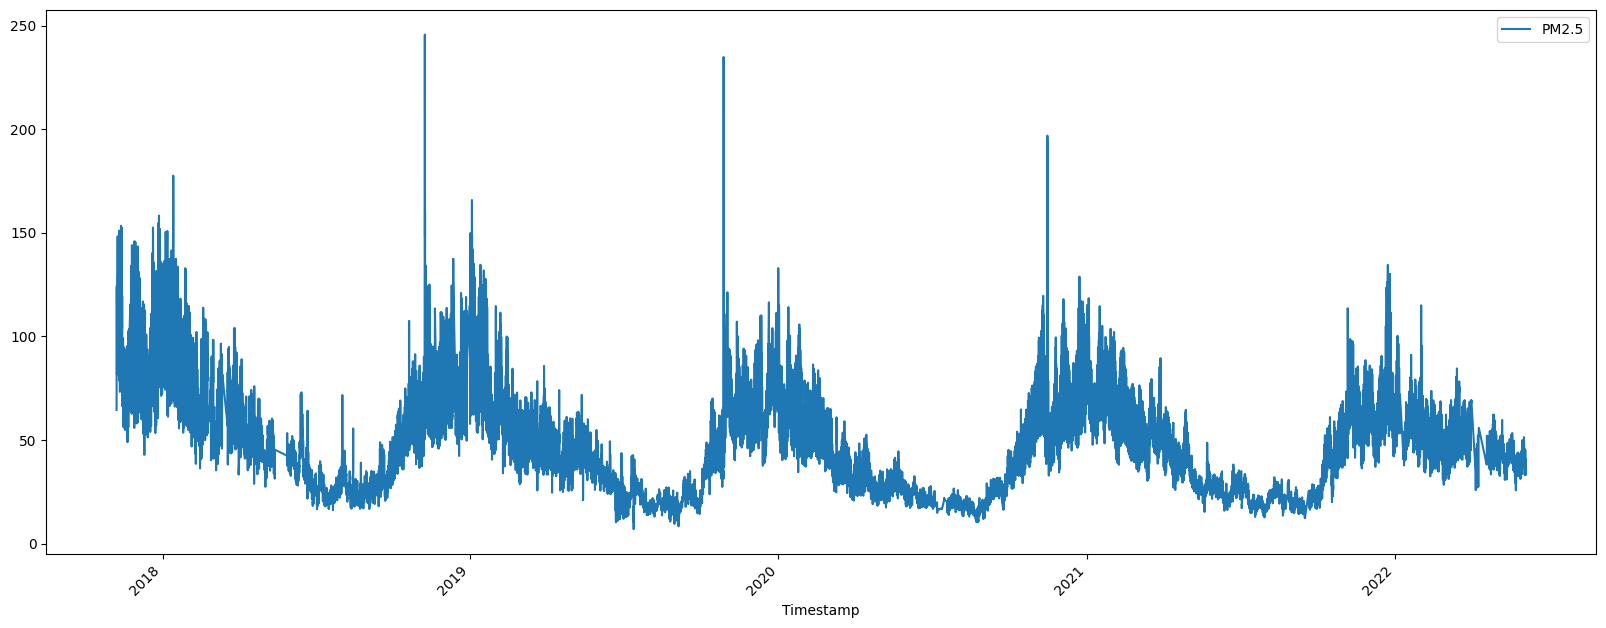

In [11]:
df.plot(x='Timestamp',y='PM2.5',figsize=(20,8))
plt.xticks(rotation=45)

plt.show()

<Axes: xlabel='Year'>

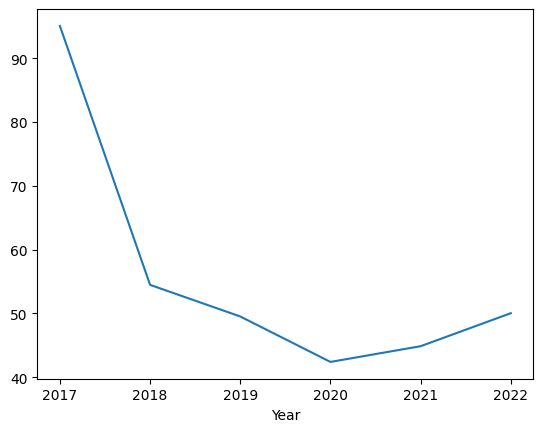

In [12]:
df.groupby('Year')['PM2.5'].mean().plot()

<Axes: xlabel='Month'>

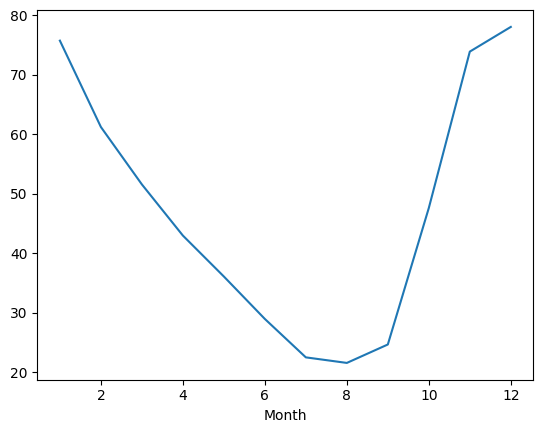

In [13]:
df.groupby('Month')['PM2.5'].mean().plot()

<Axes: xlabel='Day'>

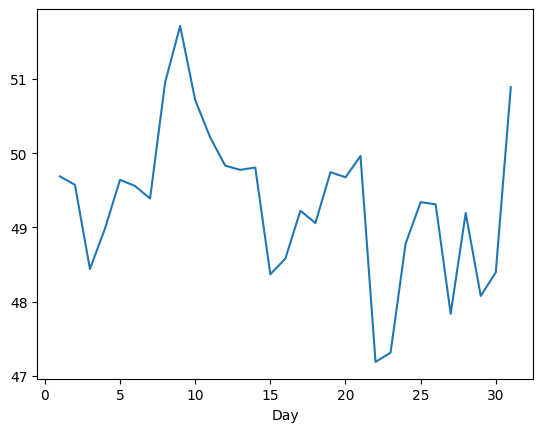

In [14]:
df.groupby('Day')['PM2.5'].mean().plot()

<Axes: xlabel='Hour'>

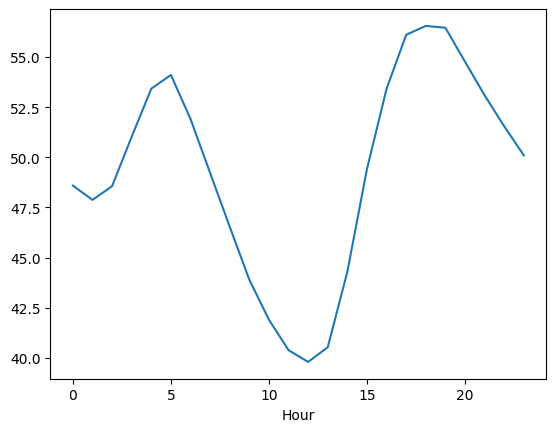

In [15]:
df.groupby('Hour')['PM2.5'].mean().plot()

In [16]:
df_date=pd.DataFrame(df.groupby('Date')['PM2.5'].mean())
df_date

,PM2.5
Date,
2017-11-07,99.805833
2017-11-08,110.979565
2017-11-09,114.915833
2017-11-10,119.404091
2017-11-11,109.267273
...,...
2022-05-31,41.465417
2022-06-01,41.645833
2022-06-02,42.255417


In [17]:
df_date.describe()

,PM2.5
count,1616.000000
mean,48.817932
std,23.314375
min,12.635714
25%,27.327396
50%,47.194792
75%,65.185852
max,120.354000


In [18]:
from sklearn.model_selection import train_test_split
train_pm, test_pm = train_test_split(df_date, test_size = 0.2, random_state=42)

In [19]:
# untuk plot Q-Q
import scipy.stats as stats

# Fungsi untuk membuat histogram, Q-Q plot, dan boxplot
def check_plot(df, variable):
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

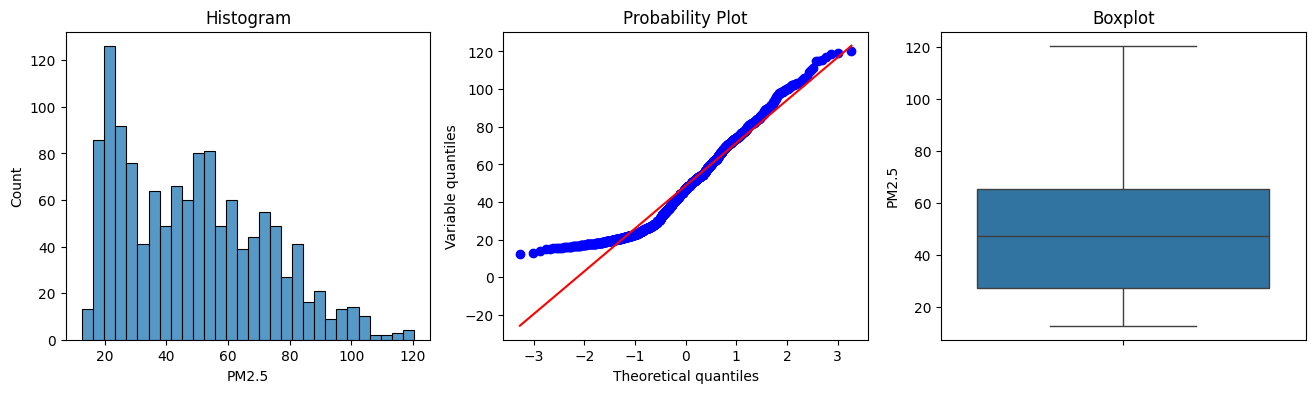

In [20]:
# Plot untuk setiap kolom
for kolom in ['PM2.5']:
    check_plot(train_pm, kolom)

In [21]:
# Fungsi untuk mencari batas outlier
def find_outlier_boundary(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)
    return upper_boundary, lower_boundary

In [22]:
# Check outlier limits
for kolom in train_pm.columns:
    upper_limit, lower_limit = find_outlier_boundary(train_pm, kolom)
    print(f'==== {kolom} ====')
    print(f'Nilai batas atas dari {kolom}: {upper_limit}')
    print(f'Nilai batas bawah dari {kolom}: {lower_limit}')
    print(f'Jumlah outlier di atas batas: {sum(train_pm[kolom] > upper_limit)}')
    print(f'Jumlah outlier di bawah batas: {sum(train_pm[kolom] < lower_limit)}')

    # Mengganti outlier
    train_pm[kolom] = np.where(train_pm[kolom] > upper_limit, upper_limit,
                                 np.where(train_pm[kolom] < lower_limit, lower_limit, train_pm[kolom]))


==== PM2.5 ====
Nilai batas atas dari PM2.5: 122.64013980263158
Nilai batas bawah dari PM2.5: -30.145233004385968
Jumlah outlier di atas batas: 0
Jumlah outlier di bawah batas: 0


In [23]:
# Show first few rows before and after replacement
print(train_pm.head())

                PM2.5
Date                 
2020-12-02  79.679583
2021-07-31  17.160833
2020-12-08  73.038333
2020-10-09  43.193333
2019-11-15  72.388750


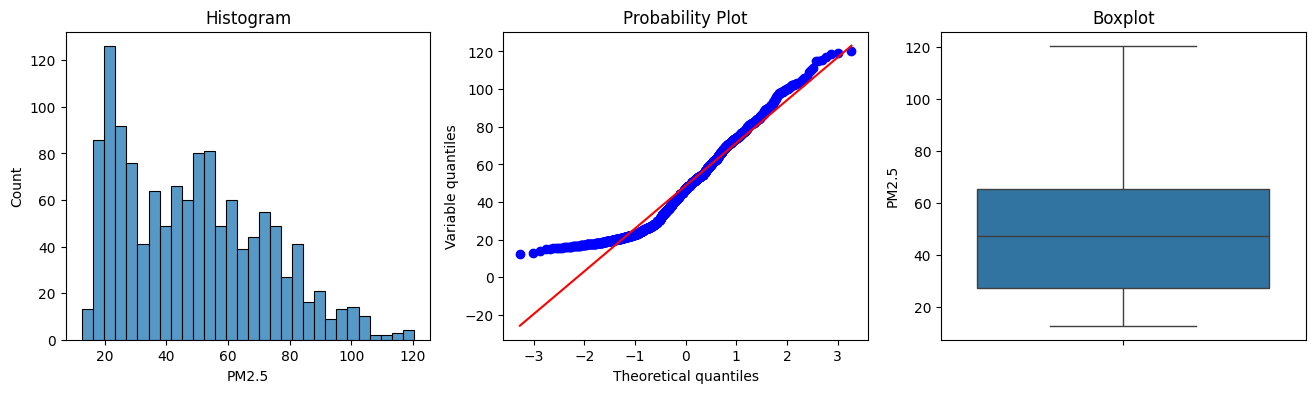

In [24]:
# Plot ulang setelah outlier diatasi
for kolom in ['PM2.5']:
    check_plot(train_pm, kolom)

# Prediction Model

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler ke data pelatihan dan transformasikan data
train_pm_scaled = scaler.fit_transform(train_pm)

# Ubah data yang telah diskalakan kembali menjadi DataFrame
train_pm_scaled = pd.DataFrame(train_pm_scaled, columns=train_pm.columns)


In [26]:
train_pm_scaled

,PM2.5
0,0.622400
1,0.042009
2,0.560746
3,0.283681
4,0.554716
...,...
1287,0.592627
1288,0.169591
1289,0.254728
1290,0.516758


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data untuk LSTM (samples, timesteps, features)
# Asumsikan kita menggunakan data time series dengan satu fitur (PM2.5)
train_X = train_pm_scaled.values.reshape(train_pm_scaled.shape[0], 1, 1)

# Buat model LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Pisahkan data pelatihan menjadi data pelatihan dan validasi
X_train, X_val, y_train, y_val = train_test_split(train_X, train_pm_scaled['PM2.5'], test_size=0.2, random_state=42)

# Latih model dan simpan riwayat pelatihan
history = model.fit(X_train, y_train, epochs=35, batch_size=32, validation_data=(X_val, y_val), verbose=2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/35
33/33 - 6s - 197ms/step - loss: 0.1346 - val_loss: 0.1040
Epoch 2/35
33/33 - 0s - 9ms/step - loss: 0.0872 - val_loss: 0.0648
Epoch 3/35
33/33 - 0s - 8ms/step - loss: 0.0519 - val_loss: 0.0378
Epoch 4/35
33/33 - 0s - 5ms/step - loss: 0.0310 - val_loss: 0.0249
Epoch 5/35
33/33 - 0s - 9ms/step - loss: 0.0225 - val_loss: 0.0213
Epoch 6/35
33/33 - 0s - 9ms/step - loss: 0.0197 - val_loss: 0.0191
Epoch 7/35
33/33 - 0s - 4ms/step - loss: 0.0175 - val_loss: 0.0168
Epoch 8/35
33/33 - 0s - 4ms/step - loss: 0.0153 - val_loss: 0.0145
Epoch 9/35
33/33 - 0s - 4ms/step - loss: 0.0130 - val_loss: 0.0121
Epoch 10/35
33/33 - 0s - 6ms/step - loss: 0.0107 - val_loss: 0.0099
Epoch 11/35
33/33 - 0s - 12ms/step - loss: 0.0086 - val_loss: 0.0078
Epoch 12/35
33/33 - 0s - 4ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 13/35
33/33 - 0s - 4ms/step - loss: 0.0049 - val_loss: 0.0042
Epoch 14/35
33/33 - 0s - 4ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 15/35
33/33 - 0s - 4ms/step - loss: 0.0023 - val

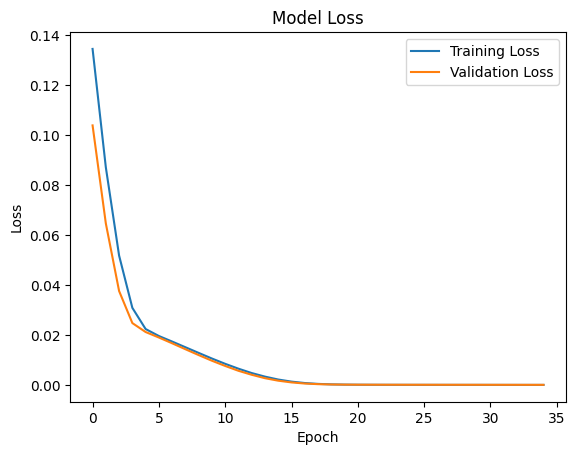

In [28]:
# Plot loss training dan validasi
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prediksi pada data pelatihan
train_predict = model.predict(X_train)
# Prediksi pada data validasi
val_predict = model.predict(X_val)

# Balikkan penskalaan untuk mendapatkan prediksi dalam skala asli
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_train_orig = scaler.inverse_transform(y_train.values.reshape(-1, 1))
val_predict = scaler.inverse_transform(val_predict.reshape(-1, 1))
y_val_orig = scaler.inverse_transform(y_val.values.reshape(-1, 1))

# Hitung metrik evaluasi untuk data pelatihan
train_mse = mean_squared_error(y_train_orig, train_predict)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_orig, train_predict)
train_mape = np.mean(np.abs((y_train_orig - train_predict) / y_train_orig)) * 100
train_r2 = r2_score(y_train_orig, train_predict)

# Hitung metrik evaluasi untuk data validasi
val_mse = mean_squared_error(y_val_orig, val_predict)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val_orig, val_predict)
val_mape = np.mean(np.abs((y_val_orig - val_predict) / y_val_orig)) * 100
val_r2 = r2_score(y_val_orig, val_predict)

# Cetak metrik evaluasi
print("Metrik Evaluasi untuk Data Pelatihan:")
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("MAE:", train_mae)
print("MAPE:", train_mape)
print("R-squared:", train_r2)

print("\nMetrik Evaluasi untuk Data Validasi:")
print("MSE:", val_mse)
print("RMSE:", val_rmse)
print("MAE:", val_mae)
print("MAPE:", val_mape)
print("R-squared:", val_r2)

# --- Ulangi proses yang sama untuk data pengujian ---
# Skala data pengujian
test_pm_scaled = scaler.transform(test_pm)
test_pm_scaled = pd.DataFrame(test_pm_scaled, columns=test_pm.columns)

# Reshape data pengujian untuk LSTM
test_X = test_pm_scaled.values.reshape(test_pm_scaled.shape[0], 1, 1)

# Prediksi pada data pengujian
test_predict = model.predict(test_X)

# Balikkan penskalaan untuk mendapatkan prediksi dalam skala asli
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_test_orig = scaler.inverse_transform(test_pm['PM2.5'].values.reshape(-1, 1))

# Hitung metrik evaluasi untuk data pengujian
test_mse = mean_squared_error(y_test_orig, test_predict)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_orig, test_predict)
test_mape = np.mean(np.abs((y_test_orig - test_predict) / y_test_orig)) * 100
test_r2 = r2_score(y_test_orig, test_predict)

print("\nMetrik Evaluasi untuk Data Pengujian:")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("MAE:", test_mae)
print("MAPE:", test_mape)
print("R-squared:", test_r2)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Metrik Evaluasi untuk Data Pelatihan:
MSE: 2.047482731613028
RMSE: 1.4309027680499566
MAE: 1.1553360339238197
MAPE: 3.2227913626611953
R-squared: 0.9961969558749737

Metrik Evaluasi untuk Data Validasi:
MSE: 2.481324865162946
RMSE: 1.5752221637480048
MAE: 1.1835013623223536
MAPE: 3.271822155603197
R-squared: 0.9954737009075241
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Metrik Evaluasi untuk Data Pengujian:
MSE: 34188191.08376974
RMSE: 5847.066878681117
MAE: 5280.268423261966
MAPE: 99.06347570912884
R-squared: -4.32044261507377


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


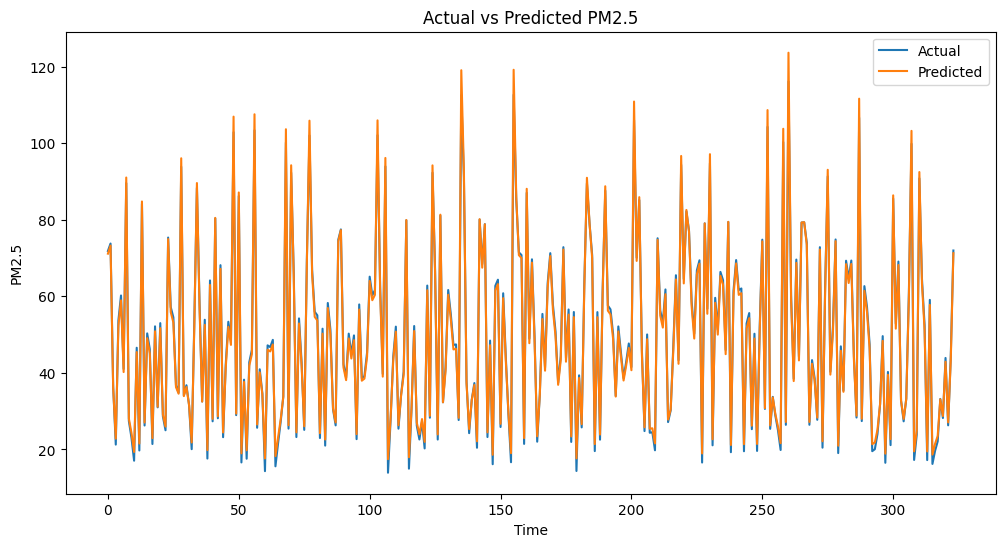

In [30]:
# Skala data pengujian menggunakan scaler yang sama yang digunakan untuk data pelatihan
test_pm_scaled = scaler.transform(test_pm)

# Ubah data pengujian yang telah diskalakan menjadi DataFrame
test_pm_scaled = pd.DataFrame(test_pm_scaled, columns=test_pm.columns)

# Ubah bentuk data pengujian untuk LSTM
test_X = test_pm_scaled.values.reshape(test_pm_scaled.shape[0], 1, 1)

# Lakukan prediksi pada data pengujian
y_pred_scaled = model.predict(test_X)

# Balikkan penskalaan untuk mendapatkan prediksi dalam skala asli
y_pred = scaler.inverse_transform(y_pred_scaled)

# Buat DataFrame untuk membandingkan nilai aktual dan prediksi
comparison_df = pd.DataFrame({'Actual': test_pm['PM2.5'].values, 'Predicted': y_pred.flatten()})

# Plot nilai aktual vs prediksi
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual'], label='Actual')
plt.plot(comparison_df['Predicted'], label='Predicted')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.legend()
plt.show()


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


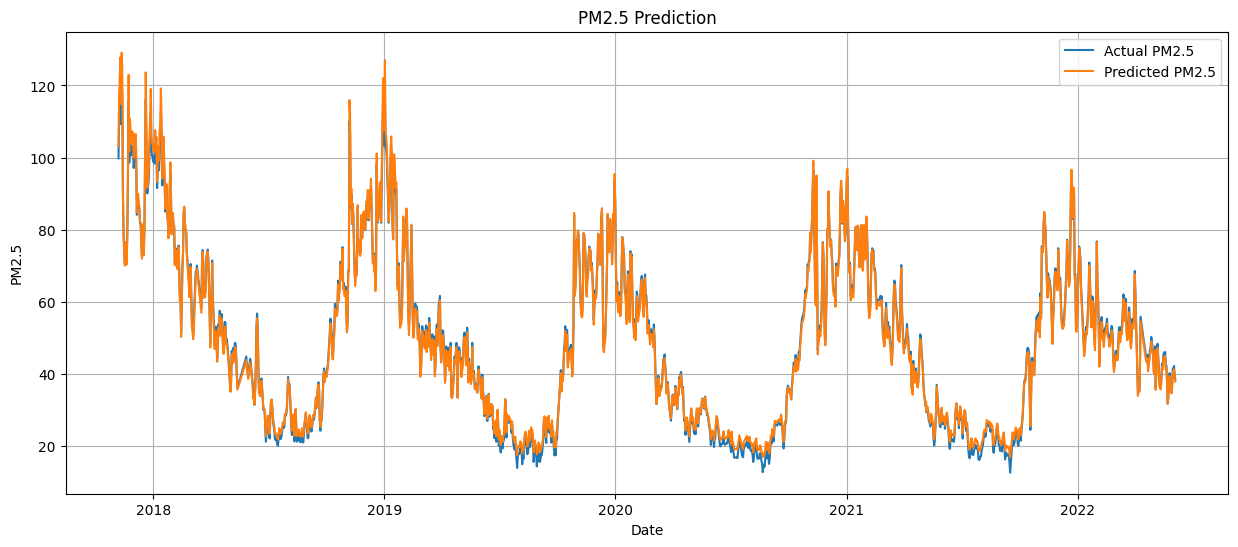

In [31]:
all_data_scaled = scaler.transform(df_date)
all_data_scaled = pd.DataFrame(all_data_scaled, columns=df_date.columns)
all_data_X = all_data_scaled.values.reshape(all_data_scaled.shape[0], 1, 1)
all_predictions_scaled = model.predict(all_data_X)
all_predictions = scaler.inverse_transform(all_predictions_scaled)

# Plot prediksi terhadap data aktual
plt.figure(figsize=(15, 6))
plt.plot(df_date.index, df_date['PM2.5'], label='Actual PM2.5')
plt.plot(df_date.index, all_predictions, label='Predicted PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('PM2.5 Prediction')
plt.grid(True)
plt.legend()
plt.show()


In [32]:
# Buat DataFrame untuk membandingkan nilai aktual dan prediksi
comparison_df = pd.DataFrame({'Actual': test_pm['PM2.5'].values, 'Predicted': y_pred.flatten()})

# Tampilkan tabel perbandingan
print(comparison_df)


        Actual  Predicted
0    71.847500  71.144707
1    73.795417  73.254242
2    36.527917  36.096142
3    21.282083  22.826448
4    53.678750  52.358986
..         ...        ...
319  28.225833  28.732639
320  43.909167  42.920959
321  26.313750  27.083393
322  44.308750  43.297916
323  71.968333  71.275024

[324 rows x 2 columns]


In [33]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [34]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    # Tuning jumlah unit LSTM
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                   activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
    # Tuning layer Dense
    model.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=512, step=32)))
    # Compile model
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mse')
    return model

In [35]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # jumlah percobaan yang dilakukan
    executions_per_trial=2,  # jumlah pengulangan setiap percobaan
    directory='my_dir',
    project_name='lstm_hyperparameter_tuning'
)

tuner.search(X_train, y_train, epochs=35, validation_data=(X_val, y_val), batch_size=32)

Trial 10 Complete [00h 00m 24s]
val_loss: 2.0977873873562203e-06

Best val_loss So Far: 1.7248422636839678e-06
Total elapsed time: 00h 08m 14s


In [36]:
best_model = tuner.get_best_models(num_models=1)[0]

# Mencetak hasil hyperparameter terbaik
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units: {best_hps.get('units')}")
print(f"Best dense units: {best_hps.get('dense_units')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best units: 512
Best dense units: 448
Best learning rate: 0.01


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [37]:
# Latih ulang model terbaik yang didapat dari hyperparameter tuning
history_tune = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32, verbose=2)

Epoch 1/50
33/33 - 4s - 117ms/step - loss: 3.2517e-04 - val_loss: 1.6710e-05
Epoch 2/50
33/33 - 2s - 72ms/step - loss: 1.4348e-05 - val_loss: 4.7826e-06
Epoch 3/50
33/33 - 1s - 42ms/step - loss: 1.5814e-06 - val_loss: 2.7266e-06
Epoch 4/50
33/33 - 3s - 95ms/step - loss: 8.0149e-07 - val_loss: 2.3884e-06
Epoch 5/50
33/33 - 2s - 65ms/step - loss: 6.6316e-07 - val_loss: 2.1914e-06
Epoch 6/50
33/33 - 2s - 56ms/step - loss: 5.8761e-07 - val_loss: 1.8904e-06
Epoch 7/50
33/33 - 2s - 61ms/step - loss: 5.0012e-07 - val_loss: 1.6740e-06
Epoch 8/50
33/33 - 2s - 57ms/step - loss: 4.3596e-07 - val_loss: 1.4891e-06
Epoch 9/50
33/33 - 3s - 91ms/step - loss: 3.7646e-07 - val_loss: 1.3437e-06
Epoch 10/50
33/33 - 2s - 57ms/step - loss: 3.2385e-07 - val_loss: 1.2578e-06
Epoch 11/50
33/33 - 2s - 68ms/step - loss: 2.8751e-07 - val_loss: 1.0439e-06
Epoch 12/50
33/33 - 2s - 49ms/step - loss: 2.4699e-07 - val_loss: 9.0432e-07
Epoch 13/50
33/33 - 3s - 90ms/step - loss: 2.0136e-07 - val_loss: 8.0367e-07
Epoch 1

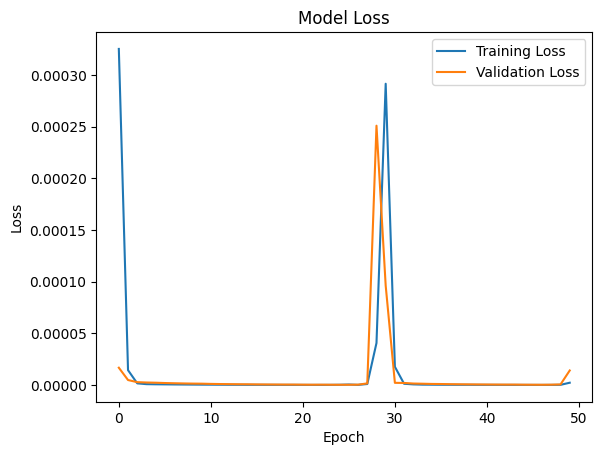

In [38]:
# Plot loss training dan validasi
plt.plot(history_tune.history['loss'], label='Training Loss')
plt.plot(history_tune.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

PR
- data pengujian menunjukkan kemungkinan overfitting
- perlunya perbaikan pada model karena overfit
- hyperparameter belum baik